In [34]:
#Importing all packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [35]:
#Package for the parquet file
import pyarrow.parquet as pq

In [36]:
df_cmm = pq.read_table(r'C:\Users\k2sin\Erdos_Inst_Bootcamp-2020\Code2020Materials\cmm_erdos_bootcamp_2020_timeseries.pq').to_pandas()

In [37]:
df_cmm.head()

,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
0,2017-01-01,2017,1,1,1,0,0,1,974,701,574
1,2017-01-02,2017,1,2,2,1,0,0,5073,2976,3149
2,2017-01-03,2017,1,3,3,1,1,0,6710,4249,3595
3,2017-01-04,2017,1,4,4,1,1,0,5746,3942,3651
4,2017-01-05,2017,1,5,5,1,1,0,5863,4279,3792


In [38]:
#Convering date_val to datetime format

df_cmm_mod = df_cmm
df_cmm_mod['date_val'] = pd.to_datetime(df_cmm_mod['date_val'])

In [39]:
# Function for calculating mean percent error

def mpe(true,pred):
    s = 0
    for i in range(len(true)):
        s += abs(true[i] - pred[i])/true[i]
    return s*100/len(true)

# Forecast for the entire year 2019

In [40]:
train_test_sep = datetime(2019,1,1)
df_cmm_mod_train = df_cmm_mod.loc[df_cmm_mod.date_val < train_test_sep]
df_cmm_mod_test = df_cmm_mod.loc[df_cmm_mod.date_val >= train_test_sep]

trainA, trainB, trainC = df_cmm_mod_train['volume_A'].values,df_cmm_mod_train['volume_B'].values,\
df_cmm_mod_train['volume_C'].values
    
testA, testB, testC = df_cmm_mod_test['volume_A'].values,df_cmm_mod_test['volume_B'].values,\
df_cmm_mod_test['volume_C'].values

In [41]:
# Seasonal naive method with seasonality of 7 days

# Using 11-17 December 
pred_snv_A = []
for i in range(len(testA)):
    ind = 716+(i%7) - 7
    pred_snv_A.append(trainA[ind])
print('Mean Percent error for Volume_A with seasonal naive method is', mpe(testA,pred_snv_A))

#Using 4-10 December
pred_snv_B = []
for i in range(len(testB)):
    ind = 709+(i%7) - 7
    pred_snv_B.append(trainB[ind])
print('Mean Percent error for Volume_B with seasonal naive method is', mpe(testB,pred_snv_B))

#Using 11-17 December
pred_snv_C = []
for i in range(len(testC)):
    ind = 716+(i%7) - 7
    pred_snv_C.append(trainC[ind])
print('Mean Percent error for Volume_C with seasonal naive method is', mpe(testC,pred_snv_C))

Mean Percent error for Volume_A with seasonal naive method is 9.593109778047888
Mean Percent error for Volume_B with seasonal naive method is 11.232879878215158
Mean Percent error for Volume_C with seasonal naive method is 13.832277230976997


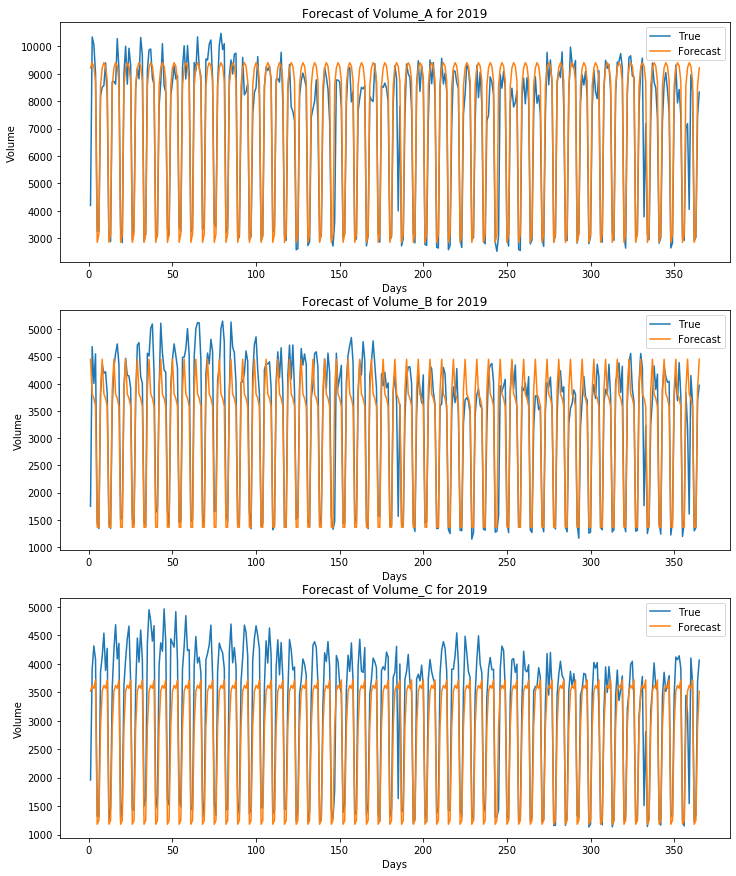

In [42]:
#Plots for Seasonal naive method with seasonality of 7 days

fig, ax = plt.subplots(3,1,figsize = (12,15))

ax[0].plot(range(1,366), testA,label = 'True')
ax[0].plot(range(1,366),pred_snv_A,label = 'Forecast')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Volume')
ax[0].set_title('Forecast of Volume_A for 2019')
ax[0].legend()

ax[1].plot(range(1,366), testB,label = 'True')
ax[1].plot(range(1,366),pred_snv_B,label = 'Forecast')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Volume')
ax[1].set_title('Forecast of Volume_B for 2019')
ax[1].legend()

ax[2].plot(range(1,366), testC,label = 'True')
ax[2].plot(range(1,366),pred_snv_C,label = 'Forecast')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('Volume')
ax[2].set_title('Forecast of Volume_C for 2019')
ax[2].legend()

# Forecast for the last 6 months of 2019

In [43]:
train_test_sep = datetime(2019,7,1)
df_cmm_mod_train = df_cmm_mod.loc[df_cmm_mod.date_val < train_test_sep]
df_cmm_mod_test = df_cmm_mod.loc[df_cmm_mod.date_val >= train_test_sep]

trainA, trainB, trainC = df_cmm_mod_train['volume_A'].values,df_cmm_mod_train['volume_B'].values,\
df_cmm_mod_train['volume_C'].values
    
testA, testB, testC = df_cmm_mod_test['volume_A'].values,df_cmm_mod_test['volume_B'].values,\
df_cmm_mod_test['volume_C'].values

In [44]:
# Seasonal naive method with seasonality of 7 days

pred_snv_A = []
for i in range(len(testA)):
    ind = 911+(i%7) - 7
    pred_snv_A.append(trainA[ind])
print('Mean Percent error for Volume_A with seasonal naive method is', mpe(testA,pred_snv_A))

pred_snv_B = []
for i in range(len(testB)):
    ind = 911+(i%7) - 7
    pred_snv_B.append(trainB[ind])
print('Mean Percent error for Volume_B with seasonal naive method is', mpe(testB,pred_snv_B))

pred_snv_C = []
for i in range(len(testC)):
    ind = 911+(i%7) - 7
    pred_snv_C.append(trainC[ind])
print('Mean Percent error for Volume_C with seasonal naive method is', mpe(testC,pred_snv_C))

Mean Percent error for Volume_A with seasonal naive method is 9.775503115721838
Mean Percent error for Volume_B with seasonal naive method is 11.560819614696564
Mean Percent error for Volume_C with seasonal naive method is 12.55872640003093


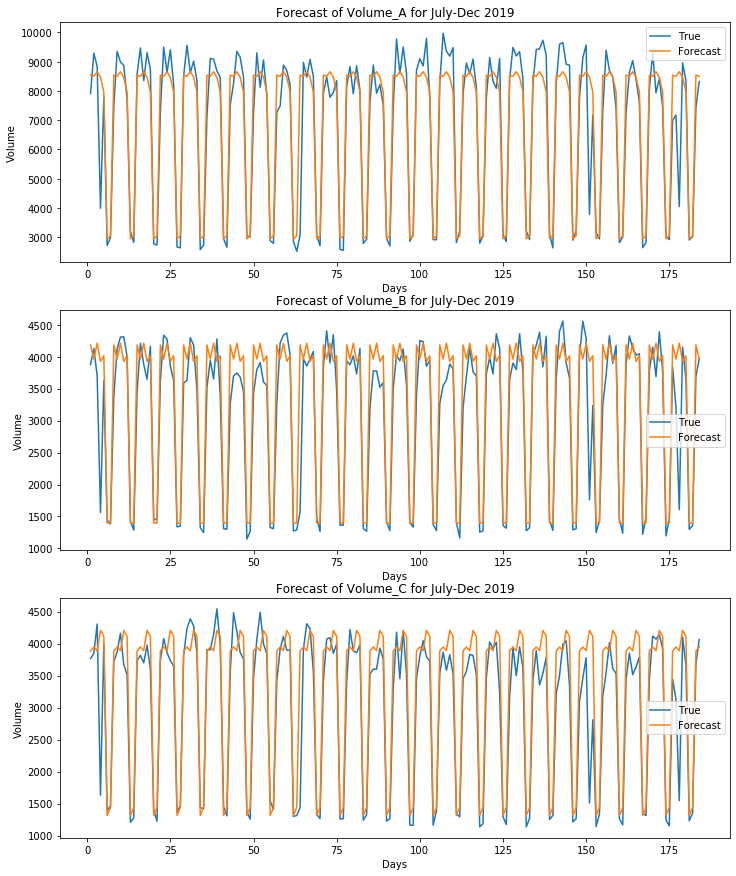

In [45]:
#Plots for Seasonal naive method with seasonality of 7 days

fig, ax = plt.subplots(3,1,figsize = (12,15))

ax[0].plot(range(1,185), testA,label = 'True')
ax[0].plot(range(1,185),pred_snv_A,label = 'Forecast')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Volume')
ax[0].set_title('Forecast of Volume_A for July-Dec 2019')
ax[0].legend()

ax[1].plot(range(1,185), testB,label = 'True')
ax[1].plot(range(1,185),pred_snv_B,label = 'Forecast')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Volume')
ax[1].set_title('Forecast of Volume_B for July-Dec 2019')
ax[1].legend()

ax[2].plot(range(1,185), testC,label = 'True')
ax[2].plot(range(1,185),pred_snv_C,label = 'Forecast')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('Volume')
ax[2].set_title('Forecast of Volume_C for July-Dec 2019')
ax[2].legend()

# Forecast for the last 3 months of 2019

In [46]:
train_test_sep = datetime(2019,10,1)
df_cmm_mod_train = df_cmm_mod.loc[df_cmm_mod.date_val < train_test_sep]
df_cmm_mod_test = df_cmm_mod.loc[df_cmm_mod.date_val >= train_test_sep]

trainA, trainB, trainC = df_cmm_mod_train['volume_A'].values,df_cmm_mod_train['volume_B'].values,\
df_cmm_mod_train['volume_C'].values
    
testA, testB, testC = df_cmm_mod_test['volume_A'].values,df_cmm_mod_test['volume_B'].values,\
df_cmm_mod_test['volume_C'].values

In [47]:
# Seasonal naive method with seasonality of 7 days

pred_snv_A = []
for i in range(len(testA)):
    ind = 996+(i%7) - 7
    pred_snv_A.append(trainA[ind])
pred_snv_A[24] = trainA[-8:-1].min()
print('Mean Percent error for Volume_A with seasonal naive method is', mpe(testA,pred_snv_A))

pred_snv_B = []
for i in range(len(testB)):
    ind = 996+(i%7) - 7
    pred_snv_B.append(trainB[ind])
pred_snv_B[24] = trainB[-8:-1].min()
print('Mean Percent error for Volume_B with seasonal naive method is', mpe(testB,pred_snv_B))

pred_snv_C = []
for i in range(len(testC)):
    ind = 996+(i%7) - 7
    pred_snv_C.append(trainC[ind])
pred_snv_C[24] = trainC[-8:-1].min()
print('Mean Percent error for Volume_C with seasonal naive method is', mpe(testC,pred_snv_C))

Mean Percent error for Volume_A with seasonal naive method is 9.772371204805204
Mean Percent error for Volume_B with seasonal naive method is 11.047801362780946
Mean Percent error for Volume_C with seasonal naive method is 11.524506094171675


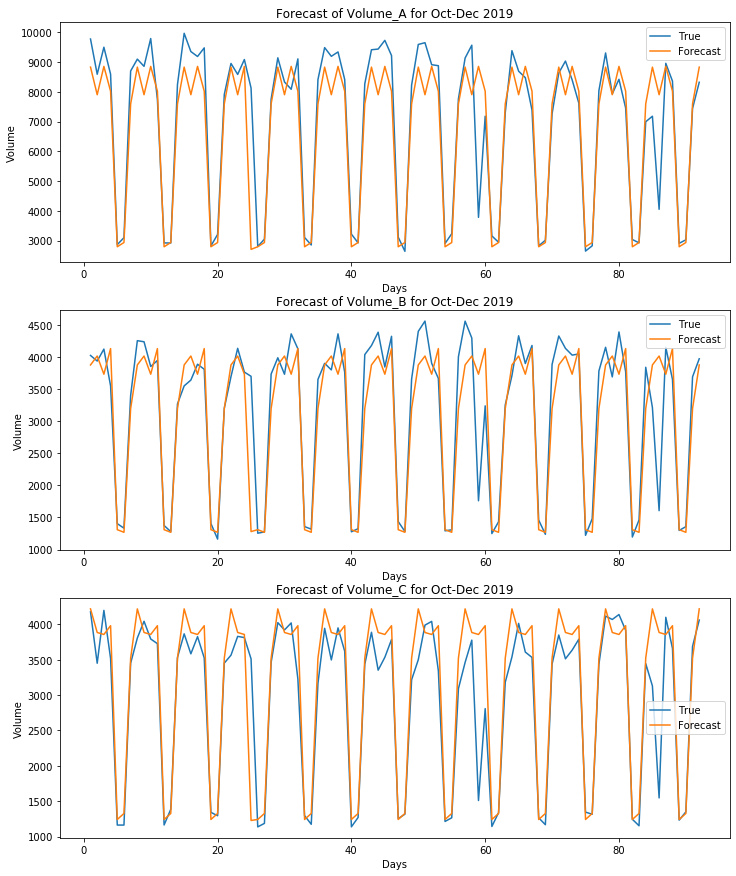

In [48]:
#Plots for Seasonal naive method with seasonality of 7 days

fig, ax = plt.subplots(3,1,figsize = (12,15))

ax[0].plot(range(1,93), testA,label = 'True')
ax[0].plot(range(1,93),pred_snv_A,label = 'Forecast')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Volume')
ax[0].set_title('Forecast of Volume_A for Oct-Dec 2019')
ax[0].legend()

ax[1].plot(range(1,93), testB,label = 'True')
ax[1].plot(range(1,93),pred_snv_B,label = 'Forecast')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Volume')
ax[1].set_title('Forecast of Volume_B for Oct-Dec 2019')
ax[1].legend()

ax[2].plot(range(1,93), testC,label = 'True')
ax[2].plot(range(1,93),pred_snv_C,label = 'Forecast')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('Volume')
ax[2].set_title('Forecast of Volume_C for Oct-Dec 2019')
ax[2].legend()

# Forecast for December 2019

In [49]:
train_test_sep = datetime(2019,12,1)
df_cmm_mod_train = df_cmm_mod.loc[df_cmm_mod.date_val < train_test_sep]
df_cmm_mod_test = df_cmm_mod.loc[df_cmm_mod.date_val >= train_test_sep]

trainA, trainB, trainC = df_cmm_mod_train['volume_A'].values,df_cmm_mod_train['volume_B'].values,\
df_cmm_mod_train['volume_C'].values
    
testA, testB, testC = df_cmm_mod_test['volume_A'].values,df_cmm_mod_test['volume_B'].values,\
df_cmm_mod_test['volume_C'].values

In [50]:
# Seasonal naive method with seasonality of 7 days
# Due to a holiday on 25th, the forecast for 25th Dec has been set to the minimum in the last week of November and
# the week of 17-23 Nov has been used for forecast due to Thanksgiving holiday in last week of November.

pred_snv_A = []
for i in range(len(testA)):
    ind = 1057+(i%7) - 7
    pred_snv_A.append(trainA[ind])
pred_snv_A[24] = trainA[-8:-1].min()
print('Mean Percent error for Volume_A with seasonal naive method is', mpe(testA,pred_snv_A))

pred_snv_B = []
for i in range(len(testB)):
    ind = 1057+(i%7) - 7
    pred_snv_B.append(trainB[ind])
pred_snv_B[24] = trainB[-8:-1].min()
print('Mean Percent error for Volume_B with seasonal naive method is', mpe(testB,pred_snv_B))

pred_snv_C = []
for i in range(len(testC)):
    ind = 1057+(i%7) - 7
    pred_snv_C.append(trainC[ind])
pred_snv_C[24] = trainC[-8:-1].min()
print('Mean Percent error for Volume_C with seasonal naive method is', mpe(testC,pred_snv_C))

Mean Percent error for Volume_A with seasonal naive method is 10.919959696018868
Mean Percent error for Volume_B with seasonal naive method is 8.912742781393801
Mean Percent error for Volume_C with seasonal naive method is 7.681598704434753


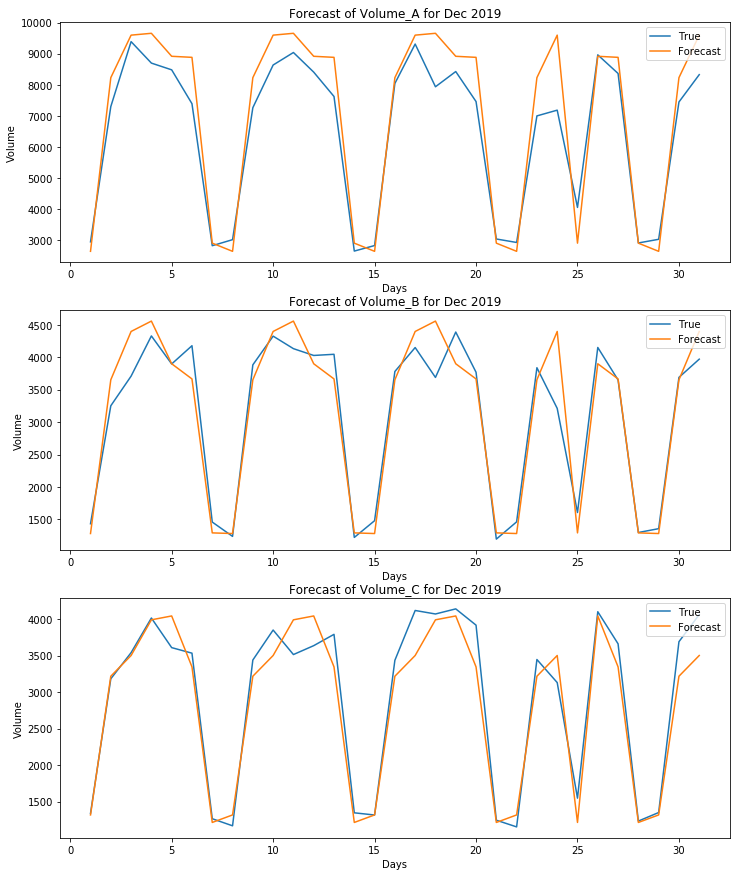

In [51]:
#Plots for Seasonal naive method with seasonality of 7 days

fig, ax = plt.subplots(3,1,figsize = (12,15))

ax[0].plot(range(1,32), testA,label = 'True')
ax[0].plot(range(1,32),pred_snv_A,label = 'Forecast')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Volume')
ax[0].set_title('Forecast of Volume_A for Dec 2019')
ax[0].legend()

ax[1].plot(range(1,32), testB,label = 'True')
ax[1].plot(range(1,32),pred_snv_B,label = 'Forecast')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Volume')
ax[1].set_title('Forecast of Volume_B for Dec 2019')
ax[1].legend()

ax[2].plot(range(1,32), testC,label = 'True')
ax[2].plot(range(1,32),pred_snv_C,label = 'Forecast')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('Volume')
ax[2].set_title('Forecast of Volume_C for Dec 2019')
ax[2].legend()